# Happy moments dataset basic analysis 

[Paper](https://arxiv.org/pdf/1801.07746.pdf). [Github](https://github.com/megagonlabs/HappyDB)

In [15]:
import pandas as pd

# Load the dataset
data = pd.read_csv('C:/Users/juanc/Downloads/cleaned_hm.csv')

# Display the first few rows of the dataset
data.head()

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category
0,27673,2053,24h,I went on a successful date with someone I fel...,I went on a successful date with someone I fel...,True,1,NaN,affection
1,27674,2,24h,I was happy when my son got 90% marks in his e...,I was happy when my son got 90% marks in his e...,True,1,NaN,affection
2,27675,1936,24h,I went to the gym this morning and did yoga.,I went to the gym this morning and did yoga.,True,1,NaN,exercise
3,27676,206,24h,We had a serious talk with some friends of our...,We had a serious talk with some friends of our...,True,2,bonding,bonding
4,27677,6227,24h,I went with grandchildren to butterfly display...,I went with grandchildren to butterfly display...,True,1,NaN,affection


In [18]:
# Check the data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100535 entries, 0 to 100534
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   hmid                   100535 non-null  int64 
 1   wid                    100535 non-null  int64 
 2   reflection_period      100535 non-null  object
 3   original_hm            100535 non-null  object
 4   cleaned_hm             100535 non-null  object
 5   modified               100535 non-null  bool  
 6   num_sentence           100535 non-null  int64 
 7   ground_truth_category  14125 non-null   object
 8   predicted_category     100535 non-null  object
dtypes: bool(1), int64(3), object(5)
memory usage: 6.2+ MB


The dataset contains 100,535 entries. Each column has this many non-null entries, except for the ground_truth_category column, which has only 14,125 non-null entries.

In [19]:
# Count the frequency of each number of sentences
num_sentence_counts = data['num_sentence'].value_counts().sort_index()

num_sentence_counts.head(10)

1     83711
2      9542
3      3847
4      1624
5       821
6       336
7       183
8       107
9        61
10       68
Name: num_sentence, dtype: int64

This table shows that most happy moments are described using just 1 or 2 sentences. However, there are some instances where up to 68 sentences are used.

I'll remove common English stop words (like 'the', 'is', 'in', etc.), perform tokenization, and then calculate the frequency of each word. Finally, I'll display the top 20 most frequent words.

In [24]:
from collections import Counter
import requests


# Define a basic list of English stop words
stopwords_list = requests.get("https://gist.githubusercontent.com/rg089/35e00abf8941d72d419224cfd5b5925d/raw/12d899b70156fd0041fa9778d657330b024b959c/stopwords.txt").content
stop_words = set(stopwords_list.decode().splitlines()) 

# Combine all the cleaned happy moments into one large text
text = ' '.join(data['cleaned_hm'])

# Tokenize the text using Python's built-in string methods
words = text.split()

# Remove stop words and non-alphabetic tokens, and convert to lower case
words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

# Calculate word frequency
word_freq = Counter(words)

# Get the 20 most common words
common_words = word_freq.most_common(20)
common_words

[('happy', 14220),
 ('time', 6666),
 ('day', 5963),
 ('work', 5564),
 ('good', 5155),
 ('friend', 4918),
 ('family', 3546),
 ('friends', 3338),
 ('finally', 3230),
 ('long', 3111),
 ('today', 3055),
 ('great', 2987),
 ('bought', 2913),
 ('son', 2878),
 ('felt', 2852),
 ('favorite', 2832),
 ('daughter', 2698),
 ('nice', 2679),
 ('dinner', 2565),
 ('feel', 2462)]

These are the words that appear most frequently in the descriptions of happy moments. They may give us some initial insights into what aspects are commonly associated with happiness. Let's create a word cloud representation

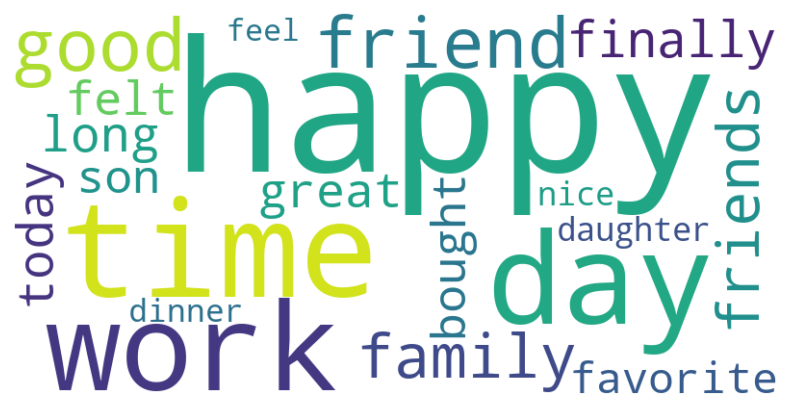

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a dictionary of word frequencies
word_freq_dict = dict(common_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

TextBlob is a Python library that can be used for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

To perform sentiment analysis, TextBlob uses an analyzer that returns a number called polarity:

Polarity: a float within the range [-1.0, 1.0] where -1 means negative sentiment, 0 means neutral sentiment, and 1 means positive sentiment. Let's apply TextBlob to the cleaned_hm column.



In [26]:
import pandas as pd
from textblob import TextBlob


# Define a function to calculate sentiment
def get_sentiment(text):
    # Create a TextBlob object
    blob = TextBlob(text)
    # Return the sentiment 
    return blob.sentiment.polarity

# Apply the function to the cleaned_hm column
data['sentiment'] = data['cleaned_hm'].apply(get_sentiment)

# Display the first few rows of the dataframe
data.head()

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category,sentiment
0,27673,2053,24h,I went on a successful date with someone I fel...,I went on a successful date with someone I fel...,True,1,NaN,affection,0.750000
1,27674,2,24h,I was happy when my son got 90% marks in his e...,I was happy when my son got 90% marks in his e...,True,1,NaN,affection,0.800000
2,27675,1936,24h,I went to the gym this morning and did yoga.,I went to the gym this morning and did yoga.,True,1,NaN,exercise,0.000000
3,27676,206,24h,We had a serious talk with some friends of our...,We had a serious talk with some friends of our...,True,2,bonding,bonding,0.022222
4,27677,6227,24h,I went with grandchildren to butterfly display...,I went with grandchildren to butterfly display...,True,1,NaN,affection,0.000000


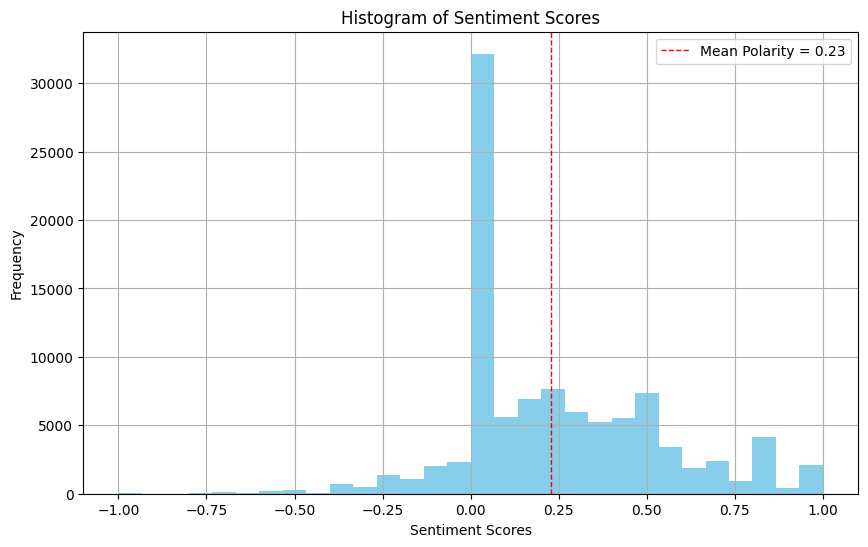

In [29]:
import matplotlib.pyplot as plt

# Summary statistics
mean_polarity = data['sentiment'].mean()
std_polarity = data['sentiment'].std()

# Create a histogram of the polarity values
plt.figure(figsize=(10,6))
plt.hist(data['sentiment'], bins=30, color='skyblue')
plt.title('Histogram of Sentiment Scores')
plt.xlabel('Sentiment Scores')
plt.ylabel('Frequency')
plt.axvline(mean_polarity, color='r', linestyle='dashed', linewidth=1, label=f"Mean Polarity = {mean_polarity:.2f}")
plt.legend()
plt.grid(True)
plt.show()


The histogram above displays the distribution of the polarity scores in the cleaned_hm column. The mean polarity score is 0.23, represented by the red dashed line in the histogram. The standard deviation of the polarity scores is 0.29.

A polarity score of 0.23 indicates that the sentiment in the dataset leans towards positive. The standard deviation of 0.29 shows there is a relatively moderate variability in the sentiment scores.

In [33]:
# Add a new column for the length of each message
data['message_length'] = data['cleaned_hm'].apply(len)

# Display the first few rows of the dataframe
data.head()

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category,sentiment,message_length
0,27673,2053,24h,I went on a successful date with someone I fel...,I went on a successful date with someone I fel...,True,1,NaN,affection,0.750000,77
1,27674,2,24h,I was happy when my son got 90% marks in his e...,I was happy when my son got 90% marks in his e...,True,1,NaN,affection,0.800000,57
2,27675,1936,24h,I went to the gym this morning and did yoga.,I went to the gym this morning and did yoga.,True,1,NaN,exercise,0.000000,44
3,27676,206,24h,We had a serious talk with some friends of our...,We had a serious talk with some friends of our...,True,2,bonding,bonding,0.022222,130
4,27677,6227,24h,I went with grandchildren to butterfly display...,I went with grandchildren to butterfly display...,True,1,NaN,affection,0.000000,70


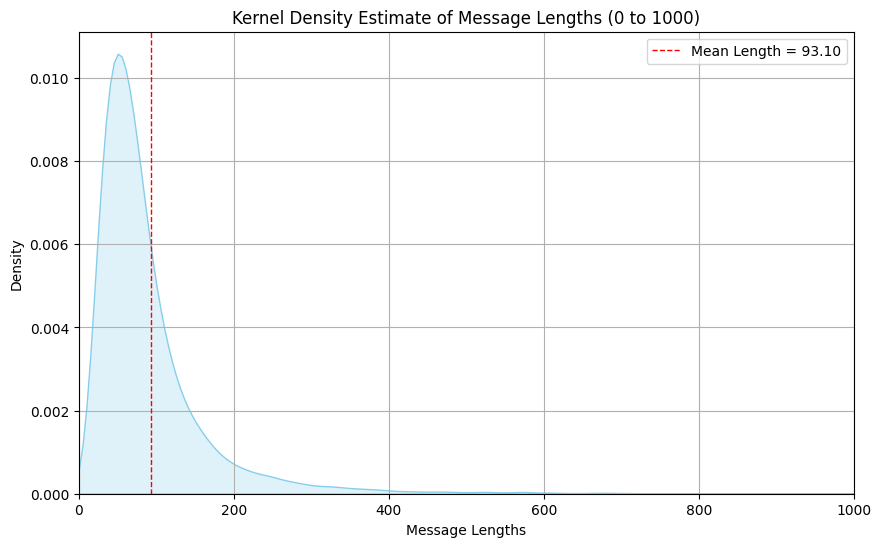

The mean message length is 93.10
The standard deviation of message lengths is 115.63


In [37]:
import seaborn as sns

# Summary statistics for message length
mean_length = data['message_length'].mean()
std_length = data['message_length'].std()

# Create a KDE plot of the message lengths (focus between 0 and 1000)
plt.figure(figsize=(10,6))
sns.kdeplot(data['message_length'], clip=(0, 1000), color='skyblue', fill=True)
plt.title('Kernel Density Estimate of Message Lengths (0 to 1000)')
plt.xlabel('Message Lengths')
plt.ylabel('Density')
plt.xlim(0, 1000)
plt.axvline(mean_length, color='r', linestyle='dashed', linewidth=1, label=f"Mean Length = {mean_length:.2f}")
plt.legend()
plt.grid(True)
plt.show()

# Print out the mean and standard deviation
print(f"The mean message length is {mean_length:.2f}")
print(f"The standard deviation of message lengths is {std_length:.2f}")

The image above displays the distribution of the message lengths in the cleaned_hm column. The mean message length is 93.10, represented by the red dashed line in the histogram. The standard deviation of the message lengths is 115.63.

This suggests that while the average message length is about 93 characters, there is a large variation in message lengths, with many messages being much shorter or longer than the average.

Next, we can check if there's any correlation between message length and sentiment. For this, we can use a scatter plot to visualize the relationship between message length and polarity scores.

<Figure size 1000x600 with 0 Axes>

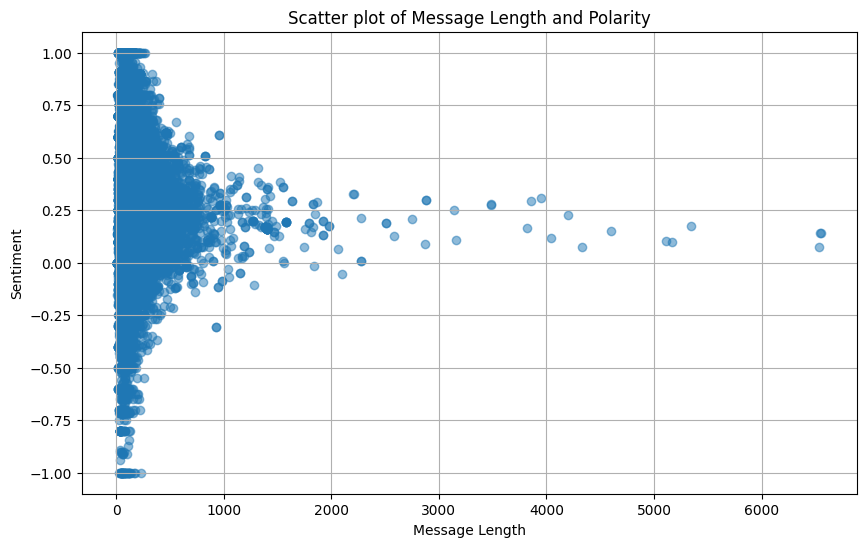

In [39]:
# Scatter plot of message length and sentiment
plt.figure(figsize=(10,6))
plt.scatter(data['message_length'], data['sentiment'], alpha=0.5)
plt.title('Scatter plot of message length and sentiment')
plt.xlabel('Message Length')
plt.ylabel('Sentiment')
plt.grid(True)
plt.show()


The scatter plot above shows the relationship between message length and polarity scores in the cleaned_hm column. Each point represents a message, with the x-coordinate indicating the length of the message and the y-coordinate indicating the polarity score.

From the plot, it's hard to see a clear trend or correlation between message length and polarity. The sentiment seems to be evenly distributed across different message lengths, suggesting that in this dataset, the length of the message does not have a strong impact on its sentiment.

In [40]:
# Scatter plot of message length and polarity (focus on message length between 0 and 1000)
plt.figure(figsize=(10,6))
plt.scatter(data['message_length'], data['sentiment'], alpha=0.5)
plt.title('Scatter plot of Message Length (0 to 1000) and Polarity')
plt.xlabel('Message Length')
plt.ylabel('Polarity')
plt.xlim(0, 1000)
plt.grid(True)
plt.show()

KeyError: 'polarity'